# 24FS\_I4DS27: Adversarial Attacks - Wie kann KI überlistet werden? <br> 08-eval-uap

In diesem Notebook wird die Pipeline entwickelt und getestet.

In [1]:
%load_ext autoreload
%autoreload 2

import os
if os.getcwd() == '/home/jovyan/work': # jhub
    os.chdir("24FS_I4DS27/main/") 
    os.system("make reqs")
else: # local
    os.chdir("../")

import torch
import torchvision
import seaborn as sns
import matplotlib.pyplot as plt

pip3 install -q -r requirements.txt


In [2]:
from src.utils.uap_helper import *
from src.utils.transform_perturbation import AddImagePerturbation

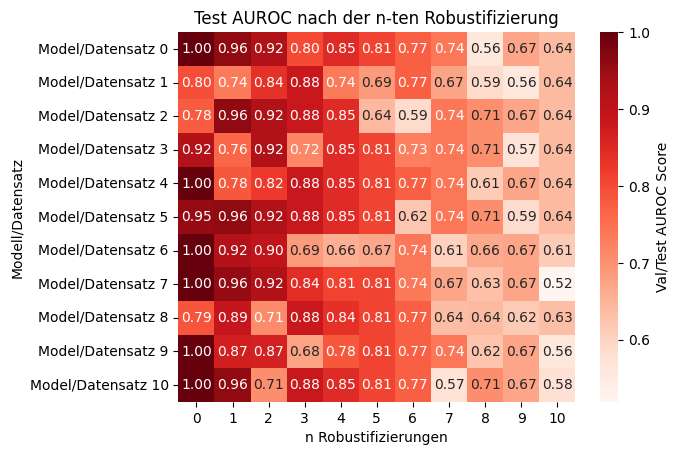

In [43]:
test_matrix = torch.linspace(1, 0.8, 11).repeat(11,1)
test_matrix *= ((torch.rand_like(test_matrix)+1.5)/2).clip(0.5, 1) * test_matrix
test_matrix = test_matrix.clip(0,1)

# plot heatmap  with numbers
sns.heatmap(test_matrix, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Val/Test AUROC Score'})
plt.yticks(torch.linspace(0, 10, 11) + 0.5, [f"Model/Datensatz {i}" for i in range(11)], rotation=0)
plt.xlabel("n Robustifizierungen")
plt.ylabel("Modell/Datensatz")
plt.title("Test AUROC nach der n-ten Robustifizierung")
plt.show()

Ziel: Schauen, ob das Modell nach den Robustifizierungen überhaupt noch gut funktioniert. (Performance Tradeoff?)

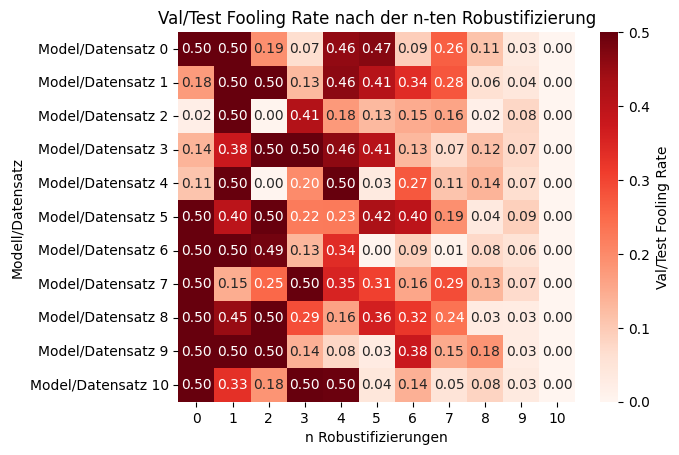

In [44]:
test_matrix = torch.linspace(1, 0.0, 11).repeat(11, 1)
test_matrix *= torch.rand_like(test_matrix)
test_matrix = test_matrix.clip(0, 0.5)

# plot heatmap  with numbers
sns.heatmap(test_matrix, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Val/Test Fooling Rate'})
plt.yticks(torch.linspace(0, 10, 11) + 0.5, [f"Model/Datensatz {i}" for i in range(11)], rotation=0)
plt.xlabel("n Robustifizierungen")
plt.ylabel("Modell/Datensatz")
plt.title("Val/Test Fooling Rate nach der n-ten Robustifizierung")
plt.show()

Ziel: Schauen, ob die Test Samples mit UAP nach n-Robustifizierungen noch gefooled werden können.

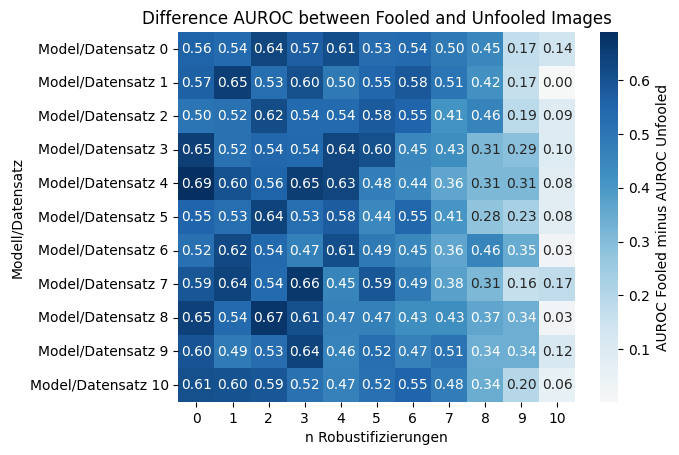

In [129]:
test_matrix = 0.5 - torch.logspace(torch.log10(torch.tensor(0.01)).item(), torch.log10(torch.tensor(0.5)).item(), steps=11).repeat(11, 1)
test_matrix += (torch.rand_like(test_matrix)) * 0.2
test_matrix = test_matrix.clip(-1, 1)

# plot heatmap  with numbers
sns.heatmap(
    test_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    center=0,
    cbar_kws={"label": "AUROC Fooled minus AUROC Unfooled"},
)
plt.yticks(torch.linspace(0, 10, 11) + 0.5, [f"Model/Datensatz {i}" for i in range(11)], rotation=0)
plt.xlabel("n Robustifizierungen")
plt.ylabel("Modell/Datensatz")
plt.title("Difference AUROC between Fooled and Unfooled Images")
plt.show()

In [124]:
end = torch.log10(torch.tensor(0.5))
start = torch.log10(torch.tensor(0.01))
0.5 - torch.logspace(torch.log10(torch.tensor(0.01)).item(), torch.log10(torch.tensor(0.5)).item(), steps=11)

tensor([4.9000e-01, 4.8456e-01, 4.7615e-01, 4.6316e-01, 4.4310e-01, 4.1212e-01,
        3.6428e-01, 2.9039e-01, 1.7626e-01, 2.9802e-08])

Ziel: Differenz zwischen den Metriken mit und ohne Adv Attack

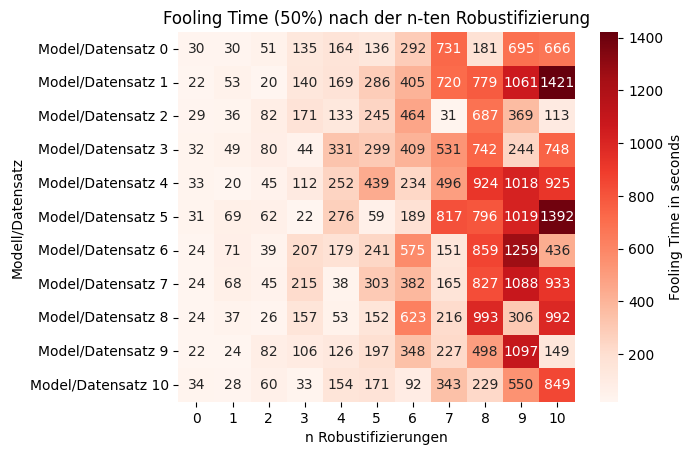

In [68]:
max_time = 1500
test_matrix = torch.linspace(max_time/10, max_time, 11).repeat(11, 1)
test_matrix *= torch.rand_like(test_matrix) * (test_matrix / max_time)
test_matrix += 20

# plot heatmap  with numbers
sns.heatmap(test_matrix, annot=True, fmt=".0f", cmap="Reds", cbar_kws={'label': 'Fooling Time in seconds'},)
plt.yticks(torch.linspace(0, 10, 11) + 0.5, [f"Model/Datensatz {i}" for i in range(11)], rotation=0)
plt.xlabel("n Robustifizierungen")
plt.ylabel("Modell/Datensatz")
plt.title("Fooling Time (50%) nach der n-ten Robustifizierung")
plt.show()

Ziel: Schauen, ob die Generation der Adv Attacks länger braucht nach der Robustifizierung